In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data=data.set_index('PassengerId')

<AxesSubplot:xlabel='Age', ylabel='Density'>

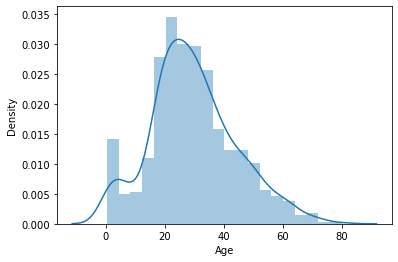

In [6]:
sns.distplot(data['Age'])

<AxesSubplot:xlabel='Age'>

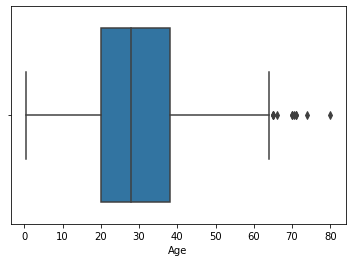

In [7]:
sns.boxplot(data['Age'])

In [8]:
data['Age']=data['Age'].fillna(data['Age'].median())
data.drop(['Cabin'],axis=1,inplace=True)
data['Embarked']=data['Embarked'].fillna(data['Embarked'].ffill())

In [9]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

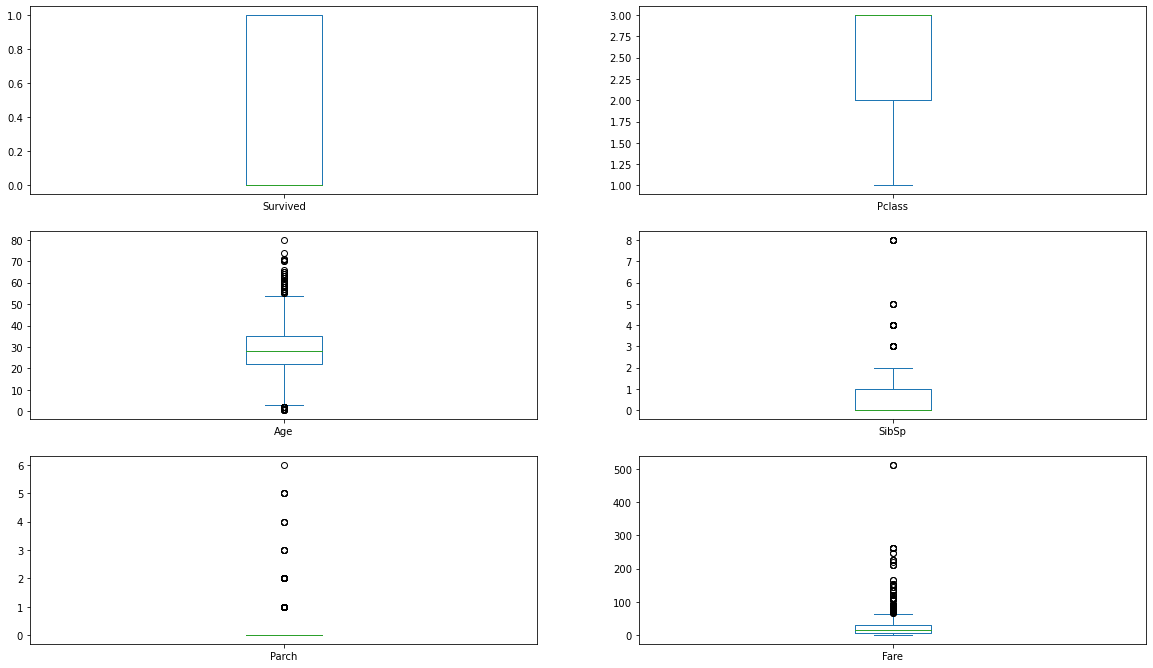

In [10]:
data.plot(kind='box',subplots=True,layout=(5,2),figsize=(20,20))
plt.show()

In [11]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [12]:
col=['Age', 'SibSp', 'Parch', 'Fare']

In [13]:
for x in col:
 Q1= np.percentile(data[x],25, interpolation='midpoint')
 Q2= np.percentile(data[x],50, interpolation='midpoint')
 Q3= np.percentile(data[x],75, interpolation='midpoint')
 IQR= Q3-Q1
 low_lim = Q1-1.5*IQR
 upp_lim = Q3+1.5*IQR
 ind1 = data[x]<low_lim
 data.drop(data.loc[ind1].index,inplace= True)
 ind2 = data[x]>upp_lim
 data.drop(data.loc[ind2].index,inplace= True)

In [14]:
data.nunique()

Survived      2
Pclass        3
Name        561
Sex           2
Age          55
SibSp         3
Parch         1
Ticket      520
Fare        144
Embarked      3
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data['Embarked']= le.fit_transform(data['Embarked'])

In [16]:
data= pd.get_dummies(data,columns=['Sex'],drop_first=True)

In [17]:
data.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,1
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,2,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,0
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,2,1
6,0,3,"Moran, Mr. James",28.0,0,0,330877,8.4583,1,1


In [18]:
x= data.iloc[:,[1,3,4,5,8,9]]
y= data['Survived']

In [19]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x= sc.fit_transform(x)
x= pd.DataFrame(x)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

### Gaussian Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb_model= gnb.fit(x_train,y_train)
y_pred_gnb= gnb_model.predict(x_test)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
acc_gnb= accuracy_score(y_test,y_pred_gnb)*100
f1_gnb=f1_score(y_test,y_pred_gnb)*100
confusion_matrix(y_test, y_pred_gnb)

array([[69, 10],
       [11, 23]], dtype=int64)

In [25]:
acc_gnb

81.41592920353983

In [26]:
f1_gnb

68.65671641791046

### Bernoulli naive bayes

In [27]:
from sklearn.naive_bayes import BernoulliNB
bnb= BernoulliNB()
bnb_model= bnb.fit(x_train,y_train)
y_pred_bnb= bnb_model.predict(x_test)

In [28]:
acc_bnb= accuracy_score(y_test,y_pred_bnb)*100
f1_bnb=f1_score(y_test,y_pred_bnb)*100
confusion_matrix(y_test, y_pred_bnb)

array([[72,  7],
       [12, 22]], dtype=int64)

In [29]:
acc_bnb

83.1858407079646

In [30]:
f1_bnb

69.84126984126983

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
Model={
    'Logistic Regression':LogisticRegression(),
    'KNN Classifier':KNeighborsClassifier(n_neighbors=6, metric="minkowski"),
    'Random Forest Classifier':RandomForestClassifier(),
    'Gradient Boosting Classifier':GradientBoostingClassifier(),
    'Decision Tree Classifier':DecisionTreeClassifier()  
}

In [32]:
result={}

for name,model in Model.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    result[name]=acc

In [34]:
result

{'Logistic Regression': 0.831858407079646,
 'KNN Classifier': 0.7787610619469026,
 'Random Forest Classifier': 0.7876106194690266,
 'Gradient Boosting Classifier': 0.8230088495575221,
 'Decision Tree Classifier': 0.7964601769911505}

Bernoulli naive bayes,Logistic Regression are suitable